# Great Expectations

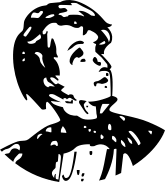

**What is Great Expectations?**\
Great Expectations is a useful tool to profile, validate, and document data. It helps to maintain the quality of data throughout a data workflow and pipeline.\
Used with a workflow orchestration service, Great Expectations can help accelerate a data solution project by catching data issues as soon as possible and notifying data engineers to fix the issues.\
**Why would I use Great Expectations?**\
Teams use Great Expectations to get more done with data, faster by:
- Saving time during data cleaning and munging.
- Accelerating ETL and data normalization.
- Streamlining analyst-to-engineer handoffs.
- Streamlining knowledge capture and requirements gathering from subject-matter experts.
- Monitoring data quality in production data pipelines and data products.
- Automating verification of new data deliveries from vendors and other teams.
- Simplifying debugging data pipelines if (when) they break.
- Codifying assumptions used to build models when sharing with other teams or analysts.
- Developing rich shared data documentation in the course of normal work.
Making implicit knowledge explicit.

**Key features**
- Expectations are like assertions in traditional Python unit tests.
- Automated data profiling automates pipeline tests.
- Data Contexts and Data Sources allow you to configure connections to your data sources.
- Tooling for validation are checkpoints for data validation.
- Data Docs clean, human-readable documentation.

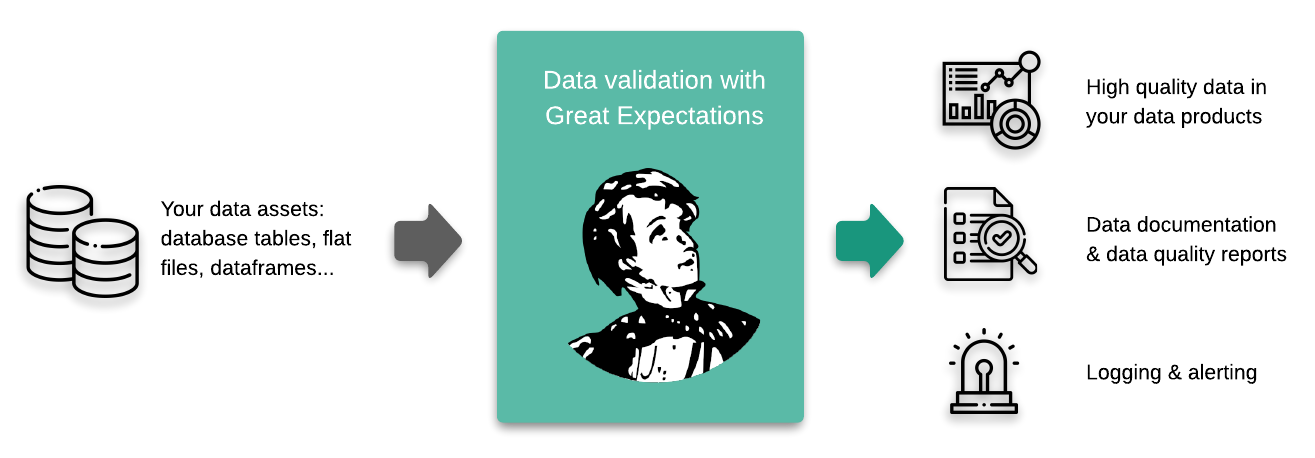

In [ ]:
!pip install great_expectations

**Make sure you restart your runtime after your done.**

In [ ]:
import pandas as pd
import great_expectations as ge

**You need to upload your local data at this point**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load data using great_expectations
my_df = ge.read_csv("loans_2007_v1.csv")

In [ ]:
# You can use all of pandas’ normal methods on it + some more from great_expectations
my_df.head()

In [ ]:
# Check the list of great_expectations methods write "my_df.expect_"
my_df.exp

check out the [link ](https://legacy.docs.greatexpectations.io/en/latest/reference/glossary_of_expectations.html#expectation-glossary)for more expectation methods


In [ ]:
# Check if the number of columns are correct
my_df.expect_table_column_count_to_equal(22)

In [ ]:
# Check if the columns have Null values or not
my_df.expect_column_values_to_not_be_null('loan_amnt')

In [ ]:
my_df['home_ownership'].unique()

In [ ]:
# Check if the column have the desired set of values
my_df.expect_column_values_to_be_in_set('home_ownership', value_set=set(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']))

In [ ]:
my_df.get_expectation_suite()

In [ ]:
# Not by default
my_df.get_expectation_suite(discard_failed_expectations=False)

In [ ]:
import json

with open( "my_expectation_file.json", "w") as my_file:
    my_file.write(
        json.dumps(my_df.get_expectation_suite(discard_failed_expectations=False).to_json_dict())
    )